## Students Information

Please enter the names and IDs of the two students below:

1. **Name**: Karim Mahmoud Kamal  
   **ID**: `9203076`

2. **Name**: Mustafa Mahmoud Hamada  
   **ID**: `9203519` 


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities or post on the classroom.

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!





## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


> **Note:** You are allowed to install any other necessary libraries you deem useful for solving the lab. Please ensure that any additional libraries are compatible with the project requirements and are properly documented in your submission.


## Maximum Likelihood Estimator (MLE) Classifier
The Maximum Likelihood Estimator (MLE) is a fundamental statistical approach used to infer the parameters of a given distribution that are most likely to result in the observed data. In the context of image classification, MLE helps to quantify the probability of observing the data within each predefined class based on their distinct statistical properties. This method is highly effective for classifying images into categories by comparing the likelihoods of the data under different model parameters, enabling the most probable class assignment.

1. **Calculate Class Priors**: Estimate the probability of each class based on the training dataset. This is expressed as:
   $$
   P(C_k) = \frac{N_k}{N}
   $$
   where \(N_k\) is the number of samples of class \(k\) and \(N\) is the total number of samples.

2. **Estimate Class-specific Parameters**: For each class, estimate parameters such as the mean \(\mu_k\) and covariance \(\Sigma_k\) of features that describe the distribution of the data:
   $$
   \mu_k = \frac{1}{N_k} \sum_{x \in C_k} x
   $$
   $$
   \Sigma_k = \frac{1}{N_k} \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^T
   $$

3. **Compute Likelihoods**: For a given test instance \(x\), compute the likelihood of that instance belonging to each class using the estimated parameters:
   $$
   p(x | C_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
   $$

4. **Classify Based on Maximum Likelihood**: Assign the class label to each test instance based on the highest likelihood, which can be calculated as:
   $$
   \hat{y} = \arg\max_{k} P(C_k) \cdot p(x | C_k)
   $$

The Naive Bayes classifier is perhaps the most well-known application of the Maximum Likelihood Estimator principle in classification tasks. It assumes that the features in each class are independent, simplifying the computation of likelihoods. While Naive Bayes is popular for its simplicity and efficiency, it is not the only technique that leverages the MLE approach. Other classical alternatives include Logistic Regression, which applies MLE to estimate the parameters that best predict categorical outcomes, and Gaussian Mixture Models, which use MLE to estimate the parameters of multiple Gaussian distributions within the data. Students are encouraged to explore these models to gain a deeper understanding of statistical estimation techniques.


## Req- Image Classification for EuroSATallBands
Image classification is a key challenge in satellite imaging and remote sensing. As discussed in the lecture, this task is typically conducted on a pixel-wise basis because a single image can contain multiple textural elements of different celestial features. However, for this specific assignment, we will focus on identifying the dominant phenomena in the image as the basis for classification.

- **Load the Images**: Load the images of the EuroSAT dataset that belong to the **residential**, **river**, and **forest** classes.

- **Split the Dataset**: Split the dataset such that 10% of each class is used as testing data, and the remainder is used for training your classifier. Use the indices provided by `np.random.choice` with seed set to `27`. **Code is provided do not change it**.

- **Feature Extraction**: Extract suitable features from the images that you think might be relevant in distinguishing each class from the others. Keep in mind the curse of dimensionality when selecting features.

- **Implement a Maximum Likelihood Estimator (MLE)**: Implement a Maximum Likelihood Estimator (MLE) based on your training data. 
- **Report Accuracy and Average F1 Score**: After testing your classifier on the test set, report the **Accuracy** and **Average F1 Score** of your model.


In [14]:
# Add your libraries here
import numpy as np
import sklearn as scikit_learn 
import matplotlib.pyplot as plt
from skimage import io  
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
import earthpy.plot as ep
import earthpy.spatial as es
import cv2
import rasterio

ModuleNotFoundError: No module named 'osgeo'

### 1- Loading the data

In [9]:
# load the dataset from Full_dataset\EuroSATallBands\EuroSATallBands\ds\images\remote_sensing\otherDatasets\sentinel_2\tif
import os
import cv2
import matplotlib.pyplot as plt

data_set_path = 'Full_dataset/EuroSATallBands/EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif'

# load only the following classes: Forest, Residential, River
forest_data = []
residential_data = []
river_data = []
forest_imges_labels = []
residential_imges_labels = []
river_imges_labels = []

for folder in os.listdir(data_set_path):
    if folder == 'Forest':
        for image in os.listdir(data_set_path + '/' + folder):
            img = io.imread(data_set_path + '/' + folder + '/' + image)
            forest_data.append(img)
            forest_imges_labels.append(image)
    if folder == 'Residential':
        for image in os.listdir(data_set_path + '/' + folder):
            img = io.imread(data_set_path + '/' + folder + '/' + image)
            residential_data.append(img)
            residential_imges_labels.append(image)
    if folder == 'River':
        for image in os.listdir(data_set_path + '/' + folder):
            img = io.imread(data_set_path + '/' + folder + '/' + image)
            river_data.append(img)
            river_imges_labels.append(image)
            
print('Number of images in Forest:', len(forest_data))
print('Number of images in Residential:', len(residential_data))
print('Number of images in River:', len(river_data))


Number of images in Forest: 3000
Number of images in Residential: 3000
Number of images in River: 2500


In [ ]:
# Read in raster image 'RBN_Forest_27.tif'
file_path = '/content/RBN_Forest_27.tif'
file_path2 = '/content/Forest_27.tif'

src_ds = gdal.Open(file_path, gdal.GA_ReadOnly)
src_ds2 = gdal.Open(file_path2, gdal.GA_ReadOnly)

band_count = src_ds.RasterCount

corrected_images = []
total_l1_loss = 0

file_path = 'output.txt'


# File automatically closed when exiting the 'with' block

for i in range(1, band_count+1):
    band = src_ds.GetRasterBand(i)
    band2 = src_ds2.GetRasterBand(i)

    band_array = band.ReadAsArray()
    band_array2 = band2.ReadAsArray()

    corrected_img, num_corrected, bad_pixel_indices, corrected_pixel_indices = remove_bad_pixels(band_array)
    corrected_images.append(corrected_img)

    corrected_img = corrected_img.astype(np.int32)
    band_array22 = band_array2.astype(np.int32)

    # Calculate L1 loss
    l1_loss = np.sum(np.abs(corrected_img - band_array22))
    total_l1_loss += l1_loss

    # Open the file in write mode
    with open(file_path, 'a+') as f:
      f.write(f"Band #{i}:")
      f.write ("\n")
      f.write("Indices of bad pixels:")
      f.write ( str(bad_pixel_indices))
      f.write ("\n")
      f.write("Values of corrected pixels:")
      f.write(str(corrected_pixel_indices))
      f.write ("\n")
      f.write("Number of corrected pixels:")
      f.write( str(num_corrected ) )
      f.write ("\n")
      f.write("Total L1 Loss:" )
      f.write( str( l1_loss) )
      f.write ("\n")
      f.write("")
      f.write ("\n")


# Total L1 Loss for the image after correction
print("Total L1 Loss for the image after correction using the original image:", total_l1_loss)

# Display the original and corrected images for each band
for i in range(band_count):
    ep.plot_bands(src_ds.GetRasterBand(i+1).ReadAsArray(), cmap='viridis')
    plt.show()
    corrected_images = np.dstack(corrected_images)

    # plot band 3 of the corrected image # Make the size smaller
    ep.plot_bands(corrected_images[:, :, i], cmap='viridis')
    plt.show()

src_ds = None  # Close the dataset

### 2- Printing the firt 5 pictures of each class

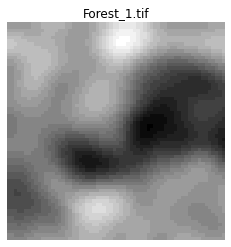

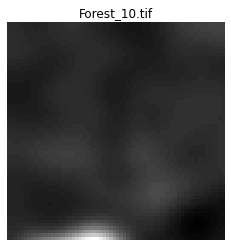

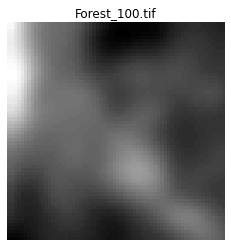

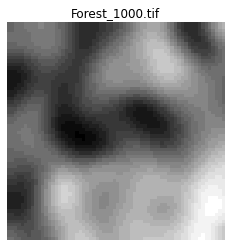

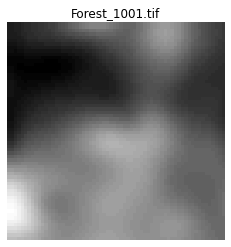

In [12]:
# print first 5 pictures of class Forest and label them 
# given that the type od them is tif
# Plot the first 5 pictures of class Forest
for i in range(5):
    # Select a single channel or create a composite image
    image = forest_data[i][:, :, 0]  # Assuming you want to plot the first channel
    
    # Plot the image
    plt.imshow(image, cmap='gray')  # Assuming grayscale images, change cmap for color images
    plt.title(forest_imges_labels[i])
    plt.axis('off')  # Turn off axis
    plt.show()



In [52]:
# DO NOT CHANGE THIS CELL
## Training set indices.
np.random.seed(27)  # Set random seed for reproducibility

# Randomly select indices for the test sets for each class
residential_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
forest_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
river_test_indices = np.random.choice(np.arange(2500), size=250, replace=False)


### 3- Spliting The data

In [53]:
# split the data of each class into training and testing sets
residential_train_data = []
residential_test_data = []
for i in range(len(residential_data)):
    if i in residential_test_indices:
        residential_test_data.append(residential_data[i])
    else:
        residential_train_data.append(residential_data[i])

forest_train_data = []
forest_test_data = []
for i in range(len(forest_data)):
    if i in forest_test_indices:
        forest_test_data.append(forest_data[i])
    else:
        forest_train_data.append(forest_data[i])

river_train_data = []
river_test_data = []
for i in range(len(river_data)):
    if i in river_test_indices:
        river_test_data.append(river_data[i])
    else:
        river_train_data.append(river_data[i])

print('Number of images in Residential training set:', len(residential_train_data))
print('Number of images in Residential testing set:', len(residential_test_data))
print('Number of images in Forest training set:', len(forest_train_data))
print('Number of images in Forest testing set:', len(forest_test_data))
print('Number of images in River training set:', len(river_train_data))
print('Number of images in River testing set:', len(river_test_data))


Number of images in Residential training set: 2700
Number of images in Residential testing set: 300
Number of images in Forest training set: 2700
Number of images in Forest testing set: 300
Number of images in River training set: 2250
Number of images in River testing set: 250


### 4- Feature Extraction

In [59]:
# We need to extract features from the images. We will use the Histogram of Oriented Gradients (HOG) feature descriptor.
# The following code extracts HOG features from the images.

from skimage.feature import hog
from skimage import exposure

def extract_hog_features(data):
    hog_features = []
    for img in data:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, multichannel=False)
        hog_features.append(fd)
    return hog_features

forest_train_features = extract_hog_features(forest_train_data)
residential_train_features = extract_hog_features(residential_train_data)
river_train_features = extract_hog_features(river_train_data)

print('Number of features in Residential training set:', len(residential_train_features))
print('Number of features in Forest training set:', len(forest_train_features))
print('Number of features in River training set:', len(river_train_features))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14296\2844989226.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


Number of features in Residential training set: 2700
Number of features in Forest training set: 2700
Number of features in River training set: 2250
(1764,)


In [61]:
print(forest_train_features[0].shape)
print(forest_train_features[1].shape)

(1764,)
(1764,)


In [55]:
# print the residential_train_features of the first image
print(residential_train_features[0])

# print the forest_train_features of the first image
print(forest_train_features[0])

# print the river_train_features of the first image
print(river_train_features[0])


[0.2092204  0.1775725  0.23873561 ... 0.24388262 0.24127475 0.        ]
[0.21538766 0.0843872  0.22719342 ... 0.09095003 0.10141444 0.05125049]
[0.28275072 0.28275072 0.05523835 ... 0.04628903 0.01291336 0.14328527]


### 5- MLE

In [56]:
# 1- Calculate Class Priors: Estimate the probability of each class based on the training dataset. 
# This is expressed as:P(C_k) = N_k/N where N_k is the number of samples of class k && N is the total number of samples.
foresr_prior = len(forest_train_features) / (len(forest_train_features) + len(residential_train_features) + len(river_train_features))
residential_prior = len(residential_train_features) / (len(forest_train_features) + len(residential_train_features) + len(river_train_features))
river_prior = len(river_train_features) / (len(forest_train_features) + len(residential_train_features) + len(river_train_features))

print('P(C_forest):', foresr_prior)
print('P(C_residential):', residential_prior)
print('P(C_river):', river_prior)
print('Sum of priors:', foresr_prior + residential_prior + river_prior)


P(C_forest): 0.35294117647058826
P(C_residential): 0.35294117647058826
P(C_river): 0.29411764705882354
Sum of priors: 1.0


In [79]:
# 2- Estimate Class-specific Parameters: For each class, estimate parameters such as the mean mu_k and covariance Sigma_k of features that describe the distribution of the data:
# mu_k = (1/N_k) * sum_{x \in C_k} x
# Sigma_k = (1/N_k) * sum_{x \in C_k} (x - mu_k)(x - mu_k)^T

# Compute the mean and variance of each feature for each class in the training set
forest_means = []
forest_variances = []
for i in range(len(forest_train_features[0])):
    feature = [f[i] for f in forest_train_features]
    forest_means.append(np.mean(feature))
    forest_variances.append(np.var(feature))

residential_means = []
residential_variances = []
for i in range(len(residential_train_features[0])):
    feature = [f[i] for f in residential_train_features]
    residential_means.append(np.mean(feature))
    residential_variances.append(np.var(feature))

river_means = []
river_variances = []
for i in range(len(river_train_features[0])):
    feature = [f[i] for f in river_train_features]
    river_means.append(np.mean(feature))
    river_variances.append(np.var(feature))

print('Forest means:', forest_means)
print('Forest variances:', forest_variances)
print('Residential means:', residential_means)
print('Residential variances:', residential_variances)
print('River means:', river_means)
print('River variances:', river_variances)

print(len(forest_means))
print(len(forest_variances))
print(len(residential_means))
print(len(residential_variances))
print(len(river_means))
print(len(river_variances))

Forest means: [0.22227522674557113, 0.1325055049522822, 0.1559596623590077, 0.15098065943829675, 0.21607108758251445, 0.10735153264844198, 0.10291784074261592, 0.0841456679845587, 0.06492499047217988, 0.2356537738254756, 0.15245690151431118, 0.17653781842031288, 0.1638144437611727, 0.1617292964267944, 0.11977837331138849, 0.11761962990605511, 0.10088904296116145, 0.07897218668817486, 0.18279657748037353, 0.14697760088583886, 0.17706496011764075, 0.17400218934870423, 0.2306291139644015, 0.13037613212924867, 0.11825536160481137, 0.09647452044582153, 0.07187458323122352, 0.20250965597162265, 0.172783423247382, 0.19718392560879885, 0.188214111809852, 0.18286844745462413, 0.14074346722011946, 0.13195842810014333, 0.11126833242767509, 0.08508730045079009, 0.23277366892041607, 0.14878907632926772, 0.17230954400140205, 0.16042541867076018, 0.1573476271658906, 0.11639412267840543, 0.11452988616921146, 0.09815407742240184, 0.07712003656254997, 0.2335591923876178, 0.14906250888529832, 0.172407639

In [104]:
# 3- Compute Likelihoods: For a given test instance x, compute the likelihood of that instance belonging to each class using the estimated parameters:   
# g_i(x) = ln ( P(C_i) ) - 0.5 * ln ( |Sigma_i| ) - 0.5 * (x - mu_i)^T * Sigma_i^(-1) * (x - mu_i)
# Test the function such that each feature in each class has mean and covariance
# The likelihood should be higher for the class that the feature belongs to

def compute_likelihood(feature, means, variances):
    likelihood = 0
    for i in range(len(feature)):
        likelihood += np.log(1 / np.sqrt(2 * np.pi * variances[i])) - (0.5 * ((feature[i] - means[i]) ** 2) / variances[i])
    return likelihood

# Test the function
feature = forest_train_features[100]
likelihood_forest = compute_likelihood(feature, forest_means, forest_variances)
likelihood_residential = compute_likelihood(feature, residential_means, residential_variances)
likelihood_river = compute_likelihood(feature, river_means, river_variances)

print('Likelihood of the feature belonging to Forest:', likelihood_forest)
print('Likelihood of the feature belonging to Residential:', likelihood_residential)
print('Likelihood of the feature belonging to River:', likelihood_river)



Likelihood of the feature belonging to Forest: 1949.4985065017847
Likelihood of the feature belonging to Residential: 2031.34594362051
Likelihood of the feature belonging to River: 1847.926242113252


In [92]:
# 3- Compute Likelihoods: For a given test instance x, compute the likelihood of that instance belonging to each class using the estimated parameters:   
# # p(x | C_k) = ( 1 / ( ( (2*pi)^(d/2) ) * ( |Sigma_k|^(1/2) ) ) ) * exp( -1/2* (x - mu_k)^T *Sigma_k^(-1) * (x - mu_k) )
# Test the function such that each feature in each class has mean and covariance
# The likelihood should be higher for the class that the feature belongs to

def compute_likelihood(feature, means, variances):
    likelihood = 0
    for i in range(len(feature)):
        likelihood += (1 / (np.sqrt(2 * np.pi * variances[i]))) * np.exp(-0.5 * ((feature[i] - means[i]) ** 2) / variances[i])

    return likelihood

def Normalize (likelihood_forest, likelihood_residential, likelihood_river):
    
    sum = likelihood_forest + likelihood_residential + likelihood_river
    likelihood_forest = likelihood_forest / sum
    likelihood_residential = likelihood_residential / sum
    likelihood_river = likelihood_river / sum

    return likelihood_forest, likelihood_residential, likelihood_river


# Test the function
feature = forest_train_features[1]
likelihood_forest = compute_likelihood(feature, forest_means, forest_variances)
likelihood_residential = compute_likelihood(feature, residential_means, residential_variances)
likelihood_river = compute_likelihood(feature, river_means, river_variances)

print('Likelihood of the feature belonging to Forest:', likelihood_forest)
print('Likelihood of the feature belonging to Residential:', likelihood_residential)
print('Likelihood of the feature belonging to River:', likelihood_river)

# normalize the likelihoods
likelihood_forest2, likelihood_residential2, likelihood_river2 = Normalize(likelihood_forest, likelihood_residential, likelihood_river)

print('Likelihood of the feature belonging to Forest:', likelihood_forest2)
print('Likelihood of the feature belonging to Residential:', likelihood_residential2)
print('Likelihood of the feature belonging to River:', likelihood_river2)
print("sum of likelihoods:", likelihood_forest2 + likelihood_residential2 + likelihood_river2)

Likelihood of the feature belonging to Forest: 7721.197046327869
Likelihood of the feature belonging to Residential: 7027.546530634063
Likelihood of the feature belonging to River: 5397.979610809565
Likelihood of the feature belonging to Forest: 0.3832482818354511
Likelihood of the feature belonging to Residential: 0.3488183395947778
Likelihood of the feature belonging to River: 0.267933378569771
sum of likelihoods: 1.0


In [90]:
# 4- Classify based on maximum likelihood: Assign the class label that has the highest likelihood for each test instance.
# Test the function using the likelihoods computed in the previous step
# The function should return the class label with the highest likelihood

def classify(likelihood_forest, likelihood_residential, likelihood_river):
    if likelihood_forest > likelihood_residential and likelihood_forest > likelihood_river:
        return 'Forest'
    elif likelihood_residential > likelihood_forest and likelihood_residential > likelihood_river:
        return 'Residential'
    else:
        return 'River'
    
# Test the function
classification = classify(likelihood_forest2, likelihood_residential2, likelihood_river2)
print('Classification:', classification)


Classification: Forest


In [107]:
# Complete Test

# 1- get one of the test images
test_img = forest_test_data[100]

# 2- extract HOG features from the test image
test_feature = extract_hog_features([test_img])[0]

# 3- compute the likelihood of the test feature belonging to each class
likelihood_forest = compute_likelihood(test_feature, forest_means, forest_variances)
likelihood_residential = compute_likelihood(test_feature, residential_means, residential_variances)
likelihood_river = compute_likelihood(test_feature, river_means, river_variances)
# 4- normalize the likelihoods
likelihood_forest2, likelihood_residential2, likelihood_river2 = Normalize(likelihood_forest, likelihood_residential, likelihood_river)
print('Likelihood of the test feature belonging to Forest:', likelihood_forest2)
print('Likelihood of the test feature belonging to Residential:', likelihood_residential2)
print('Likelihood of the test feature belonging to River:', likelihood_river2)
# 5- classify the test image
classification = classify(likelihood_forest2, likelihood_residential2, likelihood_river2)
print('Classification:', classification)


Likelihood of the test feature belonging to Forest: 0.36872287573156853
Likelihood of the test feature belonging to Residential: 0.3254619362248937
Likelihood of the test feature belonging to River: 0.3058151880435378
Classification: Forest


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14296\2844989226.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


In [109]:
# 4- Model Evaluation:
# Calculate the confusion matrix and correctly calculates and clearly shows the calculations for Accuracy and Average F1 Score for each class.

# 1- Calculate the confusion matrix
# Initialize the confusion matrix
confusion_matrix = np.zeros((3, 3))

# Classify the test instances and update the confusion matrix
for img in forest_test_data:
    test_feature = extract_hog_features([img])[0]
    likelihood_forest = compute_likelihood(test_feature, forest_means, forest_variances)
    likelihood_residential = compute_likelihood(test_feature, residential_means, residential_variances)
    likelihood_river = compute_likelihood(test_feature, river_means, river_variances)
    likelihood_forest2, likelihood_residential2, likelihood_river2 = Normalize(likelihood_forest, likelihood_residential, likelihood_river)
    classification = classify(likelihood_forest2, likelihood_residential2, likelihood_river2)
    if classification == 'Forest':
        confusion_matrix[0][0] += 1
    elif classification == 'Residential':
        confusion_matrix[0][1] += 1
    else:
        confusion_matrix[0][2] += 1

for img in residential_test_data:
    test_feature = extract_hog_features([img])[0]
    likelihood_forest = compute_likelihood(test_feature, forest_means, forest_variances)
    likelihood_residential = compute_likelihood(test_feature, residential_means, residential_variances)
    likelihood_river = compute_likelihood(test_feature, river_means, river_variances)
    likelihood_forest2, likelihood_residential2, likelihood_river2 = Normalize(likelihood_forest, likelihood_residential, likelihood_river)
    classification = classify(likelihood_forest2, likelihood_residential2, likelihood_river2)
    if classification == 'Forest':
        confusion_matrix[1][0] += 1
    elif classification == 'Residential':
        confusion_matrix[1][1] += 1
    else:
        confusion_matrix[1][2] += 1

for img in river_test_data:
    test_feature = extract_hog_features([img])[0]
    likelihood_forest = compute_likelihood(test_feature, forest_means, forest_variances)
    likelihood_residential = compute_likelihood(test_feature, residential_means, residential_variances)
    likelihood_river = compute_likelihood(test_feature, river_means, river_variances)
    likelihood_forest2, likelihood_residential2, likelihood_river2 = Normalize(likelihood_forest, likelihood_residential, likelihood_river)
    classification = classify(likelihood_forest2, likelihood_residential2, likelihood_river2)
    if classification == 'Forest':
        confusion_matrix[2][0] += 1
    elif classification == 'Residential':
        confusion_matrix[2][1] += 1
    else:
        confusion_matrix[2][2] += 1

print('Confusion Matrix:')
print(confusion_matrix)

# 2- Calculate the accuracy
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print('Accuracy:', accuracy)

# 3- Calculate the F1 score for each class
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# F1 = 2 * Precision * Recall / (Precision + Recall)
precision_forest = confusion_matrix[0][0] / np.sum(confusion_matrix[:, 0])
recall_forest = confusion_matrix[0][0] / np.sum(confusion_matrix[0])
f1_forest = 2 * precision_forest * recall_forest / (precision_forest + recall_forest)

precision_residential = confusion_matrix[1][1] / np.sum(confusion_matrix[:, 1])
recall_residential = confusion_matrix[1][1] / np.sum(confusion_matrix[1])
f1_residential = 2 * precision_residential * recall_residential / (precision_residential + recall_residential)

precision_river = confusion_matrix[2][2] / np.sum(confusion_matrix[:, 2])
recall_river = confusion_matrix[2][2] / np.sum(confusion_matrix[2])
f1_river = 2 * precision_river * recall_river / (precision_river + recall_river)

print('Precision for Forest:', precision_forest)
print('Recall for Forest:', recall_forest)
print('F1 Score for Forest:', f1_forest)

print('Precision for Residential:', precision_residential)
print('Recall for Residential:', recall_residential)
print('F1 Score for Residential:', f1_residential)

print('Precision for River:', precision_river)
print('Recall for River:', recall_river)
print('F1 Score for River:', f1_river)

# 5- Calculate the average precision, recall, and F1 score
average_precision = (precision_forest + precision_residential + precision_river) / 3
average_recall = (recall_forest + recall_residential + recall_river) / 3
average_f1 = (f1_forest + f1_residential + f1_river) / 3

print('Average Precision:', average_precision)
print('Average Recall:', average_recall)
print('Average F1 Score:', average_f1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14296\2844989226.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


Confusion Matrix:
[[285.  11.   4.]
 [  5. 294.   1.]
 [ 10.   2. 238.]]
Accuracy: 0.9611764705882353
Precision for Forest: 0.95
Recall for Forest: 0.95
F1 Score for Forest: 0.9500000000000001
Precision for Residential: 0.9576547231270358
Recall for Residential: 0.98
F1 Score for Residential: 0.9686985172981878
Precision for River: 0.9794238683127572
Recall for River: 0.952
F1 Score for River: 0.9655172413793104
Average Precision: 0.962359530479931
Average Recall: 0.9606666666666666
Average F1 Score: 0.9614052528924995


### Grading Rubric (Total: 10 Marks)

The lab is graded based on the following criteria:

1. **Data Loading and Preparation (2 Marks)**
   - Correctly loads images for the residential, river, and forest classes. (0.5 Marks)
   - Accurately splits the dataset into training and testing subsets and clearly shows this split. (1.5 Marks)

2. **Feature Extraction (2 Marks)**
   - Implements feature extraction appropriately, considering the curse of dimensionality. (1 Mark)
   - Extracts and justifies the selection of features relevant to distinguishing the classes. (1 Mark)

3. **Implementation of MLE Classifier (3 Marks)**
   - Correctly calculates and clearly shows class priors and class-specific parameters. (1 Mark)
   - Accurately computes likelihoods using the likelihood equation (probability density function) and classifies based on maximum likelihood. Must clearly show these calculations and explain the choice of likelihood equation. (2 Marks)

4. **Model Evaluation and Understanding (3 Marks)**
   - Shows **confusion matrix** and correctly calculates and clearly shows the calculations for Accuracy and Average F1 Score. (1 Mark)
   - **Comparison amongst your peers.** Compares the model's performance against those of peers to identify strengths and areas for improvement. (2 Marks)

Each section of the lab will be evaluated on completeness, and correctness in approach and analysis. Part of the rubric also includes the student's ability to explain and justify their choices and results.


## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
